# Data understanding

In [1]:
# usual imports with shorthand abbreviations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Exercise 1: import CSV

In [2]:
df = pd.read_csv("../datasets/DG_dataset1_eBayAuctions.csv")

df

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1


In [5]:
df.describe(include='all')

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
count,1972,1972,1972.000000,1972.000000,1972,1972.000000,1972.000000,1972.000000
unique,18,3,NaN,NaN,7,NaN,NaN,NaN
top,Music/Movie/Game,US,NaN,NaN,Mon,NaN,NaN,NaN
freq,403,1292,NaN,NaN,548,NaN,NaN,NaN
mean,NaN,NaN,3560.238337,6.486308,NaN,36.449087,12.926268,0.540568
std,NaN,NaN,5973.011033,2.052906,NaN,89.493858,38.856149,0.498478
min,NaN,NaN,0.000000,1.000000,NaN,0.010000,0.010000,0.000000
25%,NaN,NaN,595.000000,5.000000,NaN,4.907500,1.230000,0.000000
50%,NaN,NaN,1853.000000,7.000000,NaN,9.995000,4.500000,1.000000
75%,NaN,NaN,3380.000000,7.000000,NaN,28.000000,9.990000,1.000000


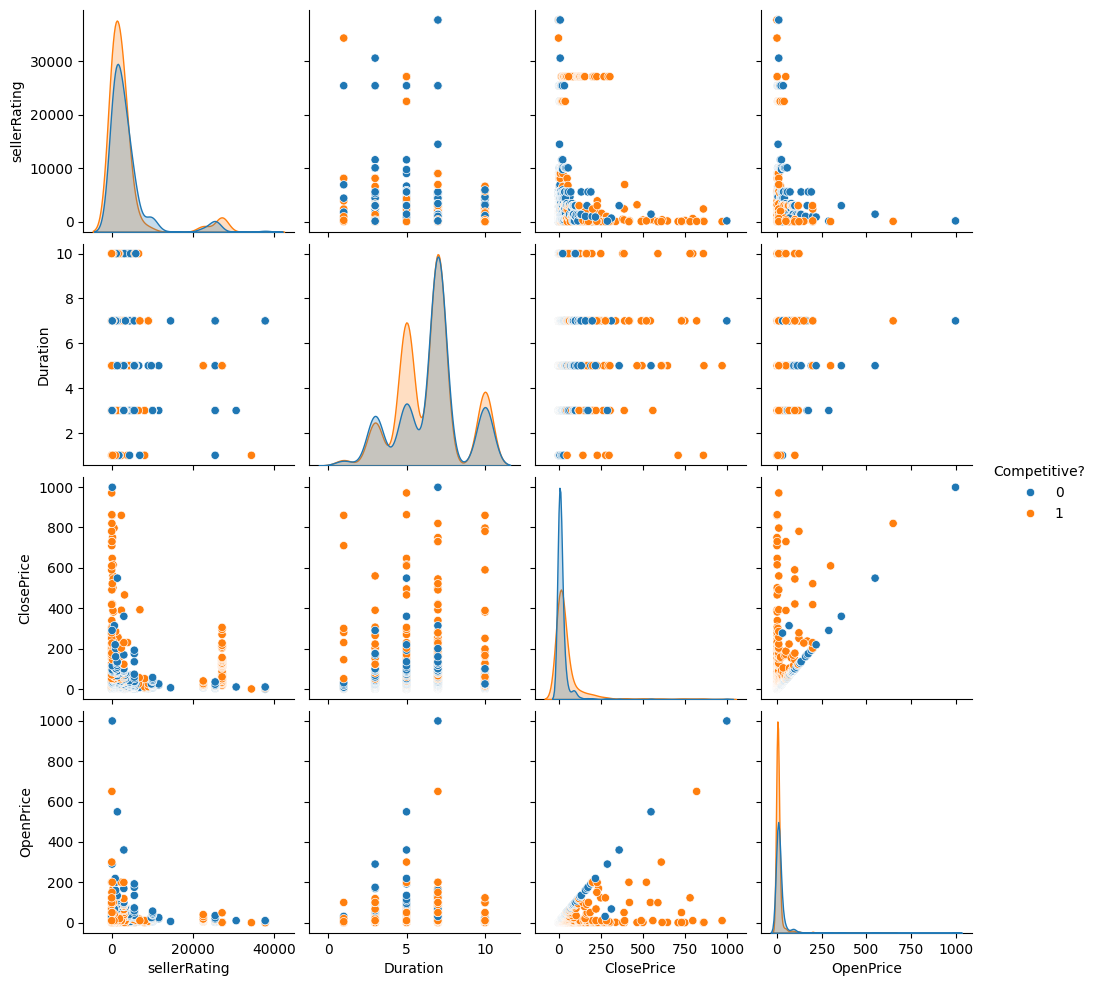

In [7]:
sns.pairplot(df, hue='Competitive?')

## Exercise 2: import SQLITE

In [14]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("../datasets/DG_dataset2_cycling_db2.db")
table_names = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con)
df = pd.read_sql(f"SELECT * FROM {table_names['name'][0]}", con)
con.close()

df.head()

,field1,Rnk,GC,Timelag,BiB,Rider,Age,Team,UCI,Pnt,...,Date,Stage_Type,Start,Finish,Race_ID,Stage#,Length,Category,Race_url,Stage_url
0,0,1,1.0,+0:00,51,BENNETT Sam,29,Deceuninck - Quick Step,60,50,...,"21 January 2020, 11:00",RR,Tanunda,Tanunda,0,1,150 km,ME - Men Elite,race/tour-down-under/2020,/stage-1/result/result
1,1,2,2.0,+0:04,91,PHILIPSEN Jasper,21,UAE-Team Emirates,25,30,...,"21 January 2020, 11:00",RR,Tanunda,Tanunda,0,1,150 km,ME - Men Elite,race/tour-down-under/2020,/stage-1/result/result
2,2,3,3.0,+0:06,102,BAŠKA Erik,26,BORA - hansgrohe,10,18,...,"21 January 2020, 11:00",RR,Tanunda,Tanunda,0,1,150 km,ME - Men Elite,race/tour-down-under/2020,/stage-1/result/result
3,3,4,10.0,+0:10,41,VIVIANI Elia,30,"Cofidis, Solutions Crédits",None,13,...,"21 January 2020, 11:00",RR,Tanunda,Tanunda,0,1,150 km,ME - Men Elite,race/tour-down-under/2020,/stage-1/result/result
4,4,5,11.0,+0:10,81,GREIPEL André,37,Israel Start-Up Nation,None,10,...,"21 January 2020, 11:00",RR,Tanunda,Tanunda,0,1,150 km,ME - Men Elite,race/tour-down-under/2020,/stage-1/result/result


In [4]:
df.columns

Index(['field1', 'Rnk', 'GC', 'Timelag', 'BiB', 'Rider', 'Age', 'Team', 'UCI',
       'Pnt', 'Time', 'Circuit', 'Race_Name', 'Stage_Name', 'Date',
       'Stage_Type', 'Start', 'Finish', 'Race_ID', 'Stage#', 'Length',
       'Category', 'Race_url', 'Stage_url'],
      dtype='object')

In [5]:
df.dtypes

field1          int64
Rnk            object
GC            float64
Timelag        object
BiB             int64
Rider          object
Age             int64
Team           object
UCI            object
Pnt            object
Time           object
Circuit         int64
Race_Name      object
Stage_Name     object
Date           object
Stage_Type     object
Start          object
Finish         object
Race_ID         int64
Stage#          int64
Length         object
Category       object
Race_url       object
Stage_url      object
dtype: object

In [9]:
df.describe(include='all')

,field1,Rnk,GC,Timelag,BiB,Rider,Age,Team,UCI,Pnt,...,Date,Stage_Type,Start,Finish,Race_ID,Stage#,Length,Category,Race_url,Stage_url
count,17153.000000,17153,15005.000000,15005,17153.000000,17153,17153.000000,17153,1051,2364,...,17153,17153,17153,17153,17153.000000,17153.000000,17153,17153,17153,15365
unique,NaN,198,NaN,6383,NaN,812,NaN,39,48,46,...,110,2,107,108,NaN,NaN,92,1,21,21
top,NaN,DNF,NaN,+0:10,NaN,DE GENDT Thomas,NaN,Deceuninck - Quick Step,10,5,...,08 September 2020,RR,Nice,Nice,NaN,NaN,166.5 km,ME - Men Elite,race/tour-de-france/2020,/stage-1/result/result
freq,NaN,907,NaN,922,NaN,66,NaN,830,126,639,...,340,15959,622,351,NaN,NaN,544,17153,3420,1597
mean,8576.000000,NaN,76.702566,NaN,109.673410,NaN,28.314056,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.653763,6.905498,NaN,NaN,NaN,NaN
std,4951.788919,NaN,45.057089,NaN,65.409054,NaN,4.341135,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.501731,5.761627,NaN,NaN,NaN,NaN
min,0.000000,NaN,1.000000,NaN,1.000000,NaN,18.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,4288.000000,NaN,38.000000,NaN,54.000000,NaN,25.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.000000,2.000000,NaN,NaN,NaN,NaN
50%,8576.000000,NaN,76.000000,NaN,107.000000,NaN,28.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.000000,5.000000,NaN,NaN,NaN,NaN
75%,12864.000000,NaN,114.000000,NaN,165.000000,NaN,31.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15.000000,11.000000,NaN,NaN,NaN,NaN


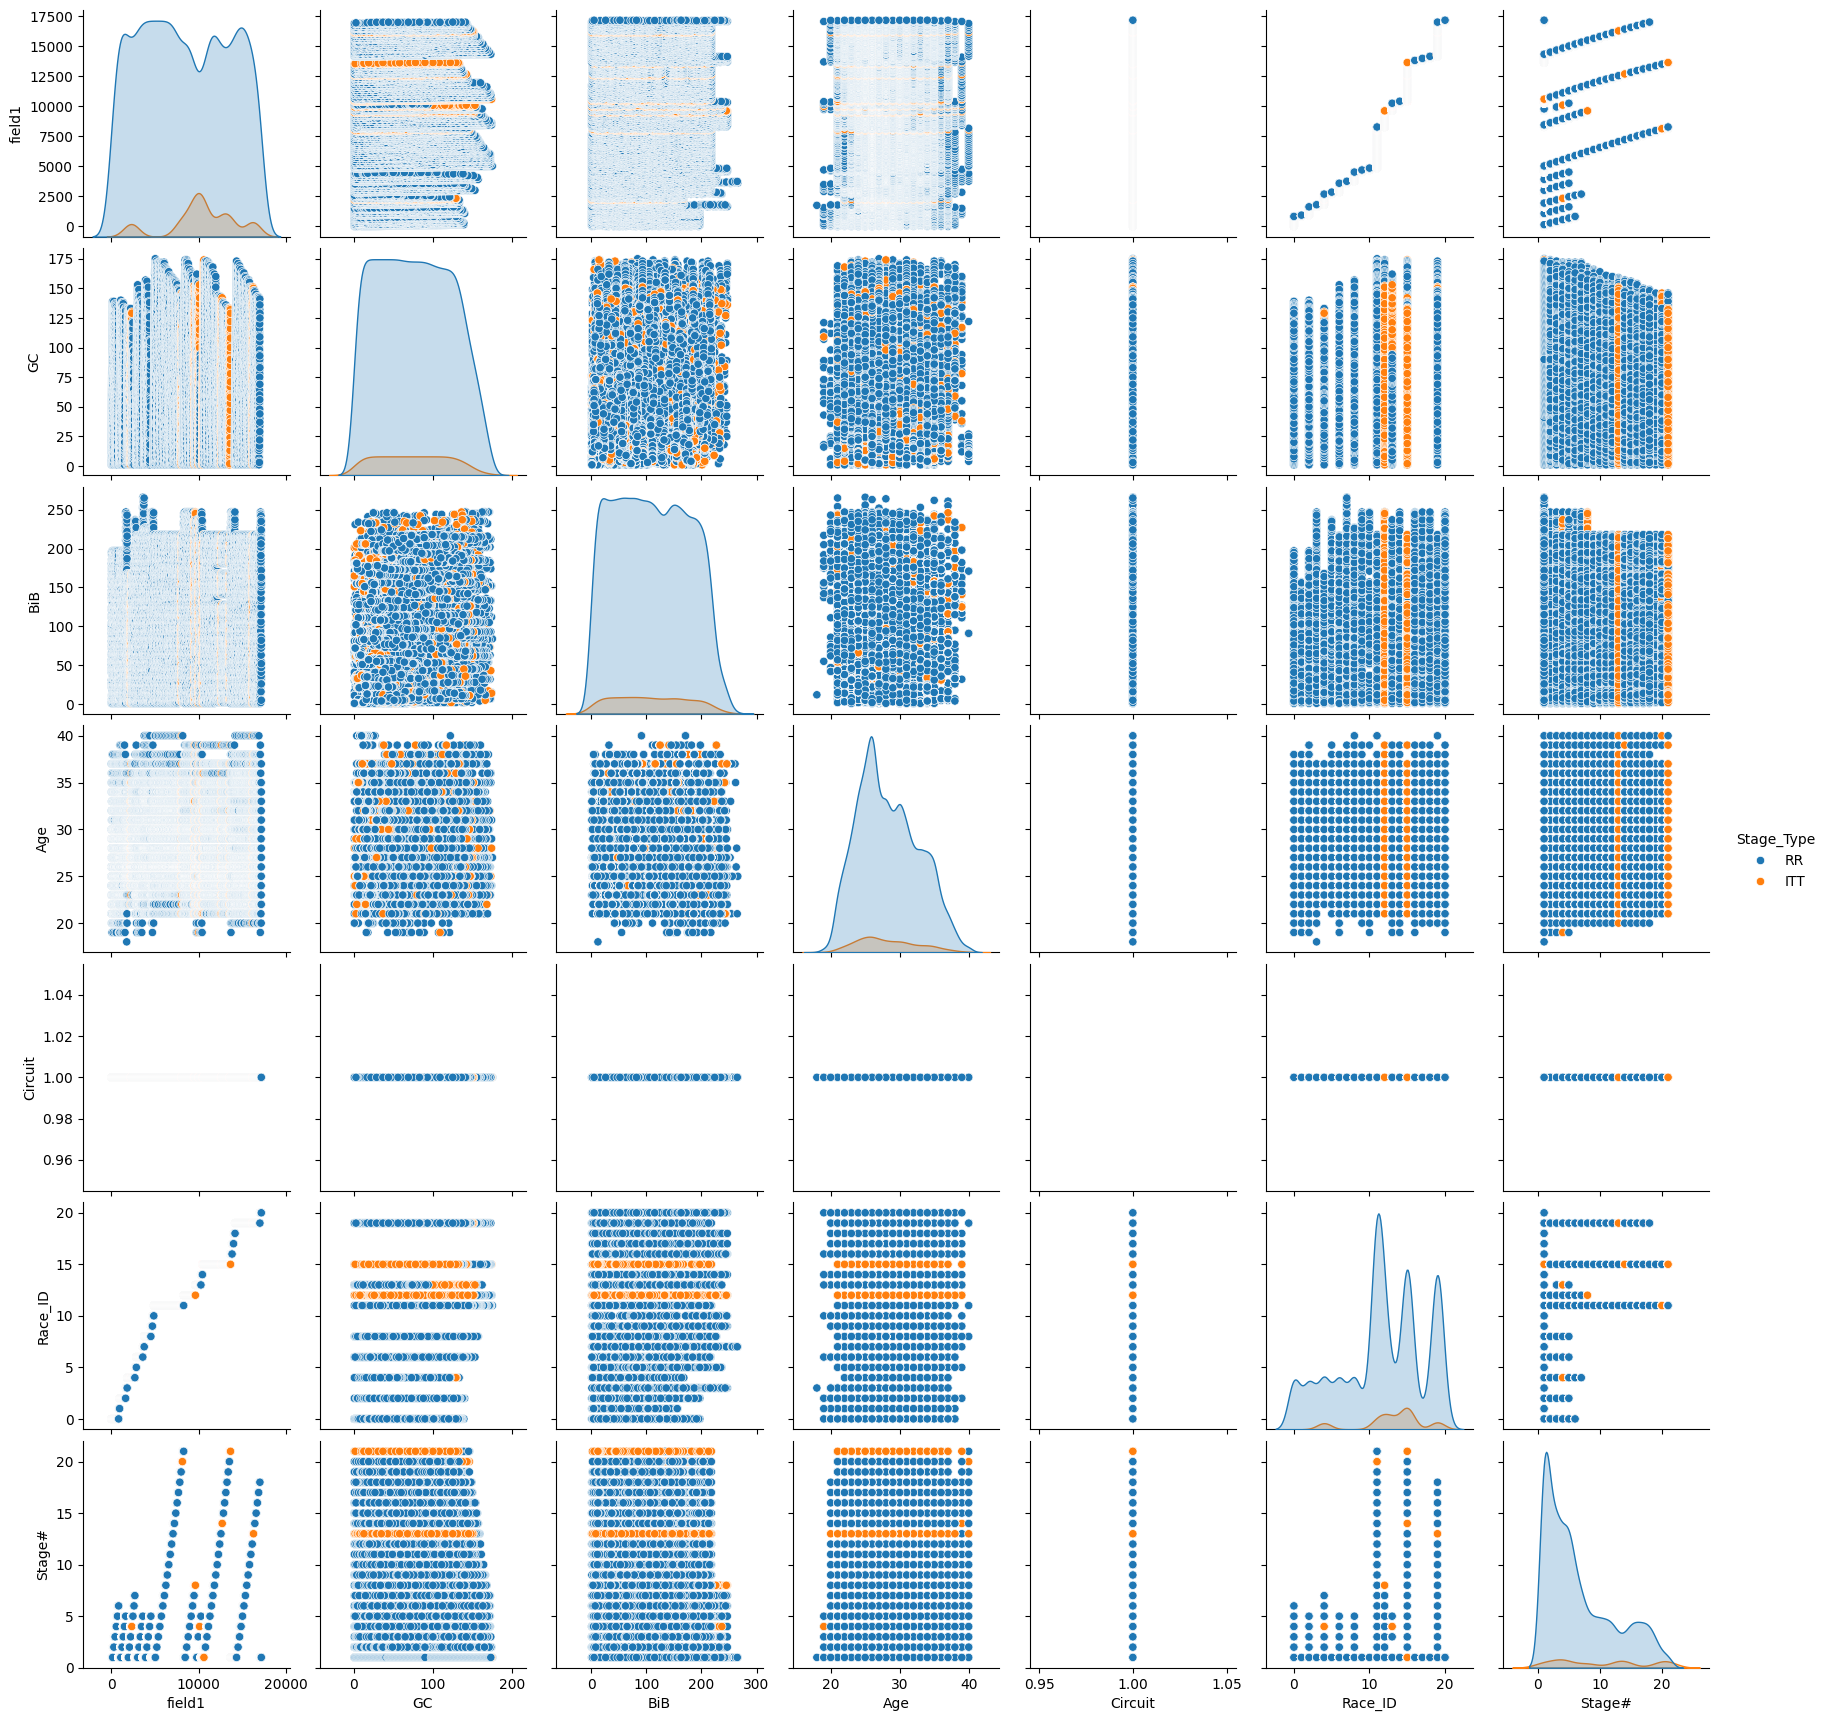

In [10]:
sns.pairplot(df, hue='Stage_Type')